In [1]:
import xarray as xr
import numpy as np

In [2]:
ds = xr.open_dataset("./jhd.100.nc", chunks="auto")

ds.info

/opt/homebrew/lib/python3.10/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (nnz: 2048, nny: 2048, nnx: 2048)
Dimensions without coordinates: nnz, nny, nnx
Data variables:
    u        (nnz, nny, nnx) float32 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    v        (nnz, nny, nnx) float32 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    w        (nnz, nny, nnx) float32 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    t        (nnz, nny, nnx) float32 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    p        (nnz, nny, nnx) float32 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    e        (nnz, nny, nnx) float32 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
Attributes:
    Simulation conducted by:  Peter Sullivan, pps@ucar.edu
    Dataset built by:         Edward Patton, patton@ucar.edu
    Affiliation:              NCAR/MMM
    Code:                     NCAR-LES
    Case Description:         GABLS 1, Cooling Rate: 0.25 K/hr
    Created:       

In [3]:
ds['u'][0:100]

<xarray.DataArray 'u' (nnz: 100, nny: 2048, nnx: 2048)>
dask.array<getitem, shape=(100, 2048, 2048), dtype=float32, chunksize=(100, 256, 256), chunktype=numpy.ndarray>
Dimensions without coordinates: nnz, nny, nnx
Attributes:
    Description:  Streamwise velocity, u
    Units:        [m/s]

In [4]:
np.array(ds['u'][:,:,0]).shape

(2048, 2048)

<IPython.core.display.Javascript object>


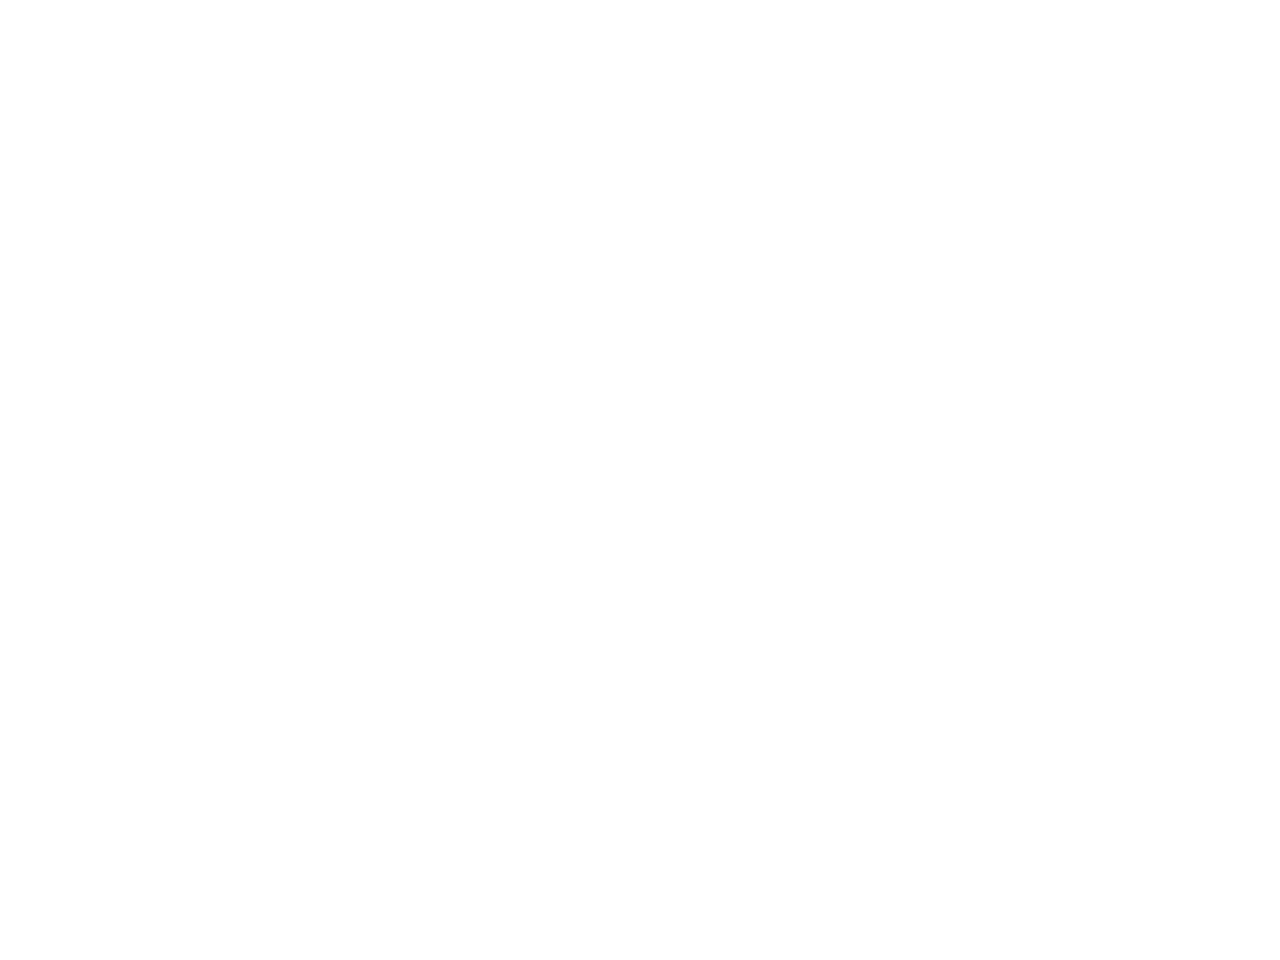

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt

plt.gray()

<IPython.core.display.Javascript object>


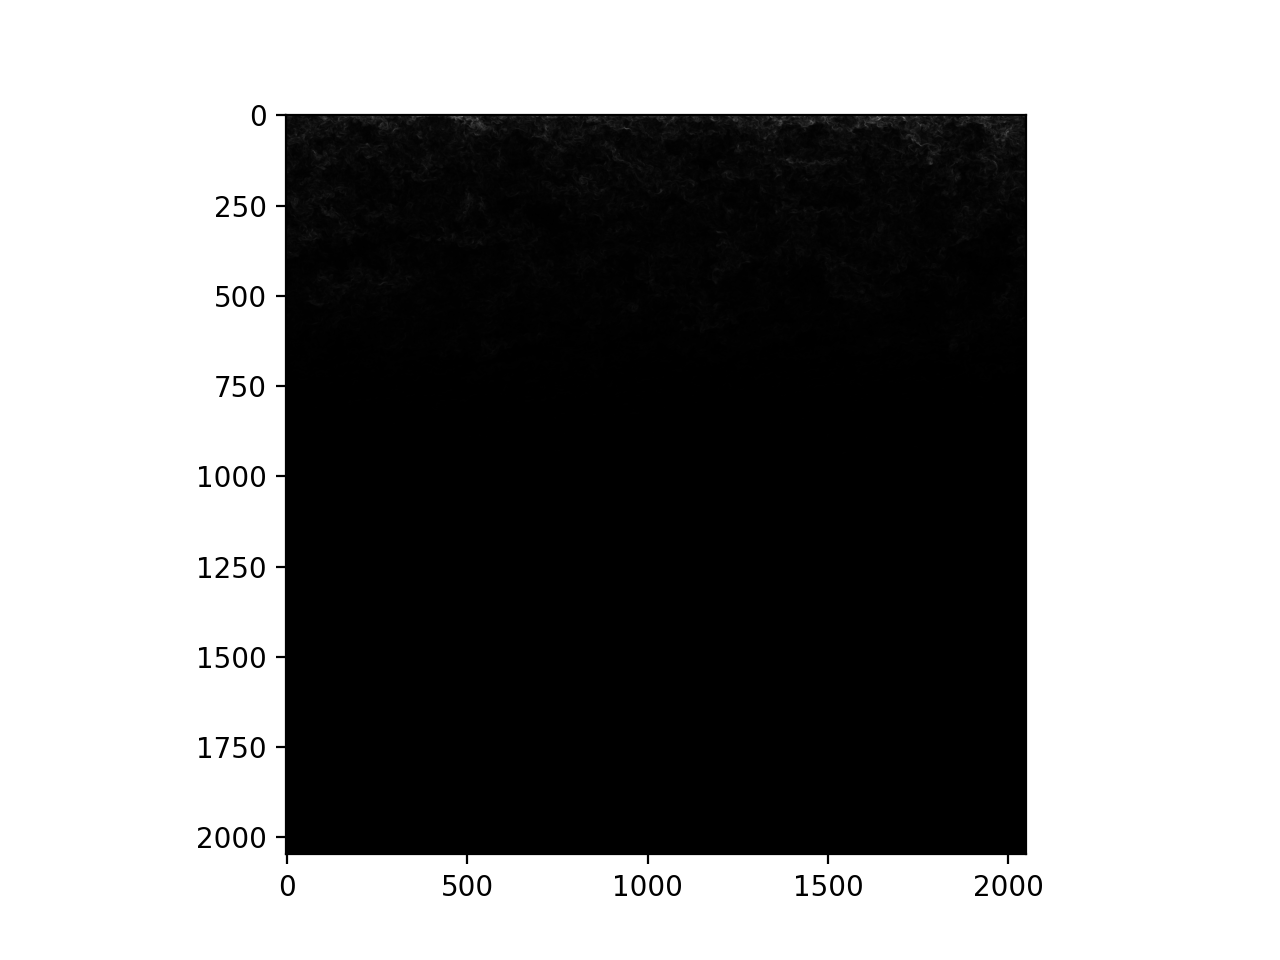

In [15]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# data = np.random.rand(100,50,50)

fig, ax = plt.subplots()

var = "e"

# ax.set_xlim((0, 50))
# ax.set_ylim((0, 50))

im = ax.imshow(ds[var][:,:,0])

def init():
    im.set_data(ds[var][:,:,0])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = ds[var][:,:,i]
    im.set_data(data_slice)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=50, blit=False)

# HTML(anim.to_html5_video())

In [ ]:
HTML(anim.to_html5_video())